In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from io import StringIO
from scipy.stats import chi2_contingency

In [4]:
df = pd.read_excel('estudio_mercado.xlsx')

In [5]:
df.head()

,edad,genero,grado_academico,profesion,residencia,experiencia_laboral,areas_interes,modalidad_preferida,ubicacion_geografica,razon_modalidad_virtual,factores_importantes
0,20,femenino,1 año de la carrera,Estudiante,Usulutan,0,tecnologia ciencias_economicas ciencias_juridi...,indiferente,NaN,NaN,flexibilidad_horarios calidad_programa oportun...
1,36,masculino,Licenciatura,Docente,Morazán,10,tecnologia ciencias_naturales_matematicas agro...,indiferente,NaN,NaN,duracion_programa costo_programa calidad_progr...
2,20,femenino,Primer año de mercadeo,Estudiante,San Miguel,0,tecnologia,presenciales,Universidad Nacional de El Salvador,NaN,flexibilidad_horarios calidad_programa oportun...
3,34,femenino,Licenciada,Docente,San Miguel,7,ciencias_humanidades,virtual,NaN,Mayor comodidad y ahorro.,flexibilidad_horarios costo_programa calidad_p...
4,24,masculino,"Licenciatura en Educacación, Especialidad en A...",Profesor,"El Divisadero, Morazan",3,ciencias_naturales_matematicas,presenciales,UES FMO,NaN,calidad_programa


## Modalidad vs Edad

/var/folders/nq/l0_9gxxj3hv1_wwwd11kyscc0000gn/T/ipykernel_23931/1746620917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='modalidad_preferida', y='edad', data=df, palette=palette)
/var/folders/nq/l0_9gxxj3hv1_wwwd11kyscc0000gn/T/ipykernel_23931/1746620917.py:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(x='modalidad_preferida', y='edad', data=df, palette=palette)


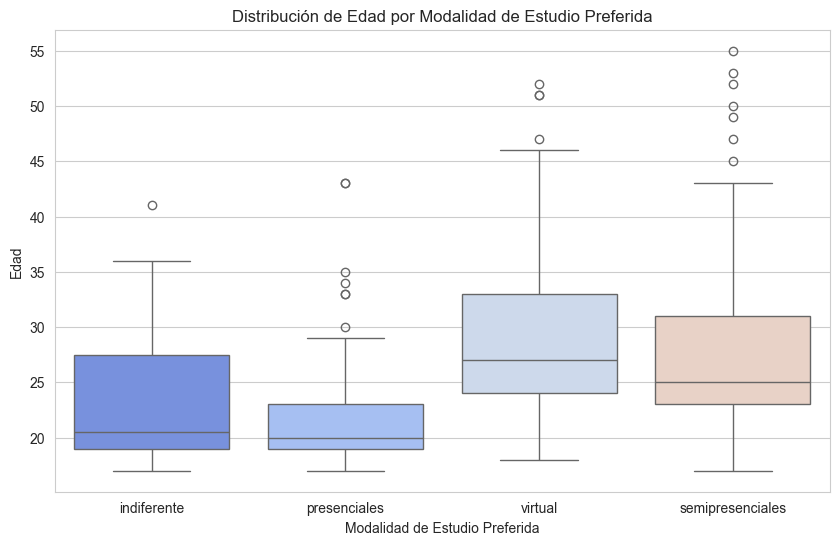

In [142]:

plt.figure(figsize=(10, 6))
palette = sns.color_palette("coolwarm", as_cmap=False)

sns.boxplot(x='modalidad_preferida', y='edad', data=df, palette=palette)

plt.title('Distribución de Edad por Modalidad de Estudio Preferida')
plt.xlabel('Modalidad de Estudio Preferida')
plt.ylabel('Edad')
plt.show()

In [143]:
grouped = df.groupby('modalidad_preferida')['edad'].describe()
print(grouped)
output_path = "Estadisticas_Descriptivas_Edad_Modalidad.csv"
grouped.to_csv(output_path)

                     count       mean       std   min   25%   50%   75%   max
modalidad_preferida                                                          
indiferente           18.0  23.777778  6.726205  17.0  19.0  20.5  27.5  41.0
presenciales          63.0  22.111111  5.685610  17.0  19.0  20.0  23.0  43.0
semipresenciales     118.0  27.830508  7.932735  17.0  23.0  25.0  31.0  55.0
virtual               79.0  29.443038  7.316555  18.0  24.0  27.0  33.0  52.0


In [144]:
round(grouped.describe(),1)

,count,mean,std,min,25%,50%,75%,max
count,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
mean,69.5,25.8,6.9,17.2,21.2,23.1,28.6,47.8
std,41.4,3.4,1.0,0.5,2.6,3.4,4.4,6.8
min,18.0,22.1,5.7,17.0,19.0,20.0,23.0,41.0
25%,51.8,23.4,6.5,17.0,19.0,20.4,26.4,42.5
50%,71.0,25.8,7.0,17.0,21.0,22.8,29.2,47.5
75%,88.8,28.2,7.5,17.2,23.2,25.5,31.5,52.8
max,118.0,29.4,7.9,18.0,24.0,27.0,33.0,55.0


tecnologia: 79
ciencias_economicas: 47
ciencias_juridicas: 20
ciencias_naturales_matematicas: 76
agronomia: 12
veterinaria: 10
ciencias_humanidades: 63
salud: 31
ingenieria_arquitectura: 62


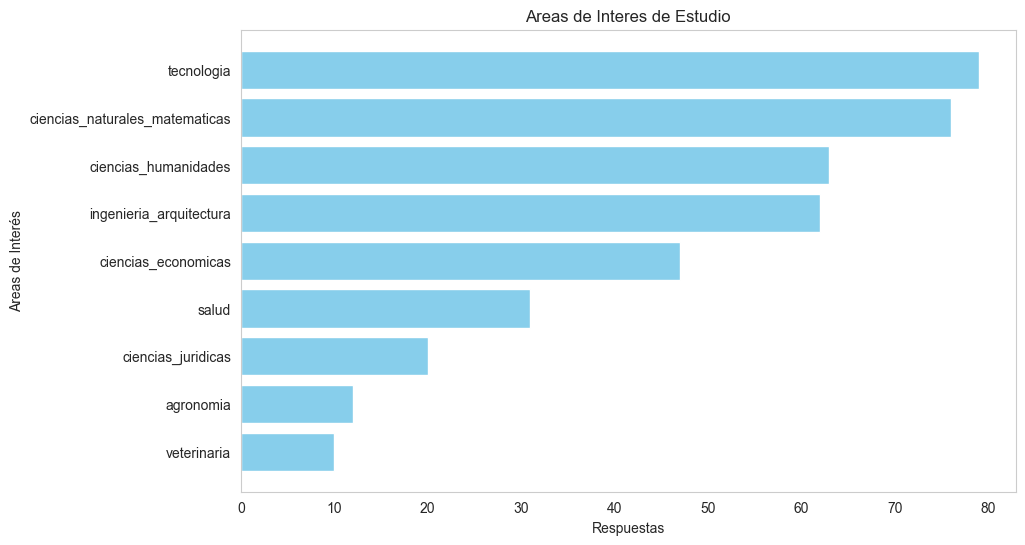

In [246]:
parrafo = """
tecnologia ciencias_economicas ciencias_juridicas tecnologia ciencias_naturales_matematicas agronomia veterinaria tecnologia ciencias_humanidades ciencias_naturales_matematicas salud tecnologia ciencias_humanidades agronomia ciencias_humanidades ciencias_humanidades   tecnologia tecnologia ingenieria_arquitectura ciencias_naturales_matematicas ingenieria_arquitectura ingenieria_arquitectura tecnologia tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura tecnologia ciencias_economicas ciencias_economicas ciencias_naturales_matematicas ciencias_naturales_matematicas tecnologia ciencias_naturales_matematicas ingenieria_arquitectura agronomia ciencias_economicas salud tecnologia ciencias_naturales_matematicas ciencias_humanidades tecnologia ciencias_naturales_matematicas ingenieria_arquitectura ciencias_economicas ciencias_economicas salud tecnologia ciencias_naturales_matematicas ciencias_juridicas ciencias_naturales_matematicas ciencias_humanidades ciencias_humanidades tecnologia ciencias_humanidades ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ingenieria_arquitectura ciencias_naturales_matematicas ciencias_humanidades veterinaria ciencias_naturales_matematicas ciencias_humanidades ciencias_naturales_matematicas ciencias_naturales_matematicas ciencias_humanidades tecnologia ciencias_naturales_matematicas tecnologia ciencias_naturales_matematicas ingenieria_arquitectura ciencias_humanidades tecnologia ciencias_naturales_matematicas ciencias_humanidades   ingenieria_arquitectura ciencias_humanidades tecnologia ciencias_naturales_matematicas tecnologia ciencias_naturales_matematicas ciencias_naturales_matematicas ciencias_juridicas ciencias_naturales_matematicas ciencias_juridicas ciencias_humanidades ciencias_naturales_matematicas tecnologia ciencias_naturales_matematicas ingenieria_arquitectura agronomia tecnologia ciencias_naturales_matematicas ciencias_juridicas ingenieria_arquitectura ciencias_humanidades veterinaria ciencias_naturales_matematicas tecnologia ciencias_humanidades ciencias_naturales_matematicas ciencias_humanidades salud tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas ingenieria_arquitectura ciencias_humanidades   ciencias_humanidades ciencias_naturales_matematicas salud tecnologia ciencias_economicas ciencias_humanidades salud ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura tecnologia ciencias_naturales_matematicas ciencias_humanidades ciencias_economicas   tecnologia ciencias_naturales_matematicas ingenieria_arquitectura salud tecnologia ciencias_naturales_matematicas ciencias_economicas tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades salud ciencias_juridicas ingenieria_arquitectura agronomia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura agronomia salud ciencias_economicas ingenieria_arquitectura ciencias_humanidades salud ciencias_naturales_matematicas ciencias_humanidades veterinaria ingenieria_arquitectura ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ciencias_humanidades ciencias_humanidades tecnologia ciencias_naturales_matematicas tecnologia tecnologia tecnologia ingenieria_arquitectura agronomia veterinaria tecnologia ciencias_naturales_matematicas ciencias_juridicas ciencias_humanidades tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades salud tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades tecnologia ingenieria_arquitectura tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ingenieria_arquitectura ciencias_naturales_matematicas tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades tecnologia   salud tecnologia ciencias_naturales_matematicas ciencias_humanidades tecnologia ingenieria_arquitectura ingenieria_arquitectura tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades ciencias_humanidades ciencias_humanidades ciencias_humanidades ciencias_naturales_matematicas ciencias_juridicas ciencias_humanidades veterinaria tecnologia tecnologia tecnologia ciencias_naturales_matematicas ciencias_humanidades ciencias_juridicas ciencias_humanidades salud ciencias_humanidades tecnologia ciencias_naturales_matematicas ciencias_humanidades ciencias_humanidades salud ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades ciencias_naturales_matematicas ciencias_humanidades tecnologia ciencias_naturales_matematicas ciencias_humanidades veterinaria salud tecnologia ciencias_naturales_matematicas ciencias_economicas tecnologia ciencias_naturales_matematicas ciencias_humanidades agronomia salud ingenieria_arquitectura tecnologia ciencias_naturales_matematicas agronomia salud tecnologia ciencias_naturales_matematicas ciencias_humanidades salud tecnologia ciencias_economicas ingenieria_arquitectura tecnologia ciencias_naturales_matematicas ingenieria_arquitectura ingenieria_arquitectura salud veterinaria ingenieria_arquitectura salud ciencias_juridicas ingenieria_arquitectura tecnologia ingenieria_arquitectura ingenieria_arquitectura salud tecnologia ingenieria_arquitectura agronomia ciencias_naturales_matematicas veterinaria salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura ingenieria_arquitectura ciencias_economicas ciencias_humanidades tecnologia ciencias_economicas ingenieria_arquitectura ciencias_humanidades ciencias_economicas ingenieria_arquitectura ingenieria_arquitectura ciencias_economicas ingenieria_arquitectura agronomia tecnologia ciencias_economicas agronomia ciencias_economicas ingenieria_arquitectura tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades ciencias_economicas tecnologia ciencias_naturales_matematicas ingenieria_arquitectura   ciencias_naturales_matematicas salud ciencias_economicas ciencias_juridicas ingenieria_arquitectura salud tecnologia veterinaria ciencias_economicas ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades salud tecnologia ciencias_economicas ciencias_juridicas ciencias_economicas ingenieria_arquitectura ingenieria_arquitectura ciencias_economicas salud ingenieria_arquitectura ingenieria_arquitectura ingenieria_arquitectura ingenieria_arquitectura tecnologia ciencias_economicas ingenieria_arquitectura ciencias_humanidades ciencias_humanidades tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ciencias_naturales_matematicas ciencias_humanidades salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades ingenieria_arquitectura tecnologia ciencias_naturales_matematicas ingenieria_arquitectura tecnologia ingenieria_arquitectura tecnologia ciencias_humanidades salud tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ingenieria_arquitectura ciencias_naturales_matematicas ingenieria_arquitectura tecnologia ciencias_naturales_matematicas tecnologia ciencias_naturales_matematicas ciencias_juridicas ingenieria_arquitectura tecnologia ciencias_naturales_matematicas ingenieria_arquitectura ciencias_humanidades salud tecnologia ciencias_naturales_matematicas ciencias_humanidades ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades   tecnologia ciencias_humanidades tecnologia ciencias_naturales_matematicas salud ciencias_humanidades tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades ciencias_economicas salud tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas ingenieria_arquitectura ciencias_naturales_matematicas   tecnologia ciencias_naturales_matematicas ciencias_humanidades"""

# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color='skyblue')
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba

plt.grid()
plt.show()

In [185]:
# Crear un DataFrame a partir del diccionario
df2 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df2 = df2.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df2)

                          Palabra  Frecuencia
0                      tecnologia          79
1  ciencias_naturales_matematicas          76
2            ciencias_humanidades          63
3         ingenieria_arquitectura          62
4             ciencias_economicas          47
5                           salud          31
6              ciencias_juridicas          20
7                       agronomia          12
8                     veterinaria          10


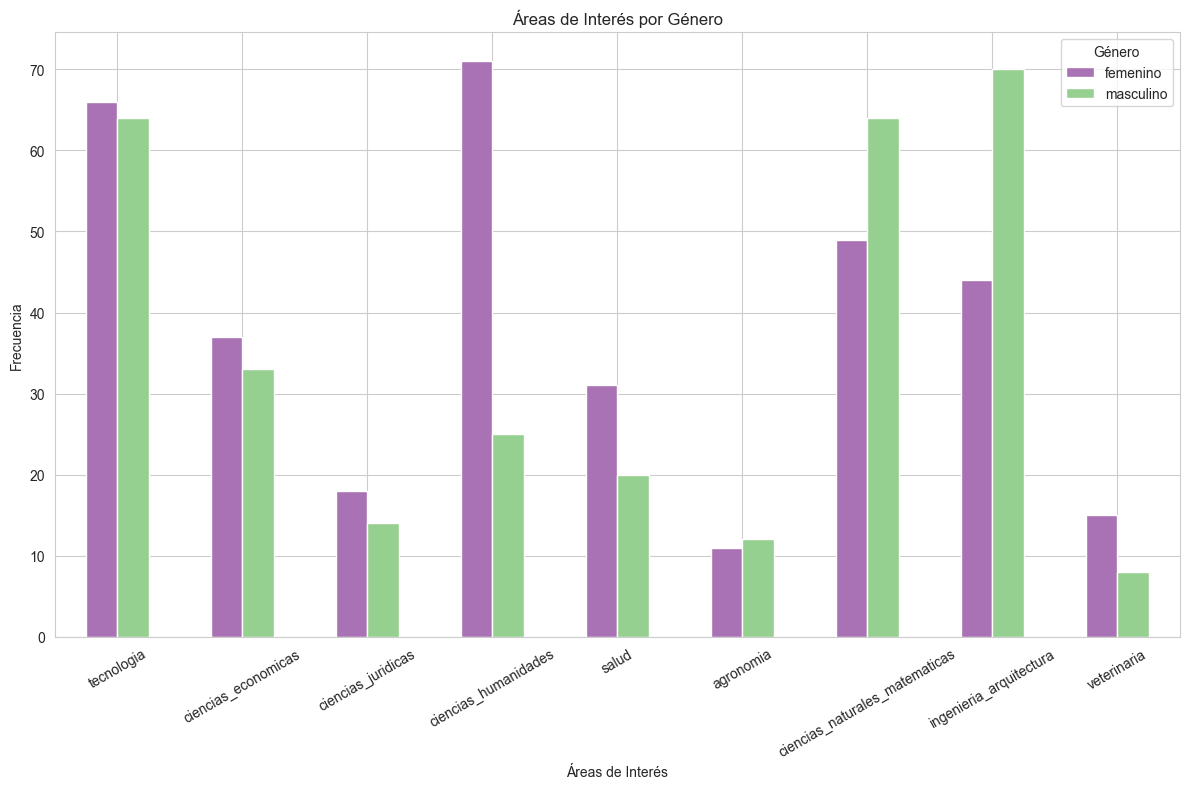

In [247]:
data = """
   genero	areas_interes
femenino	tecnologia ciencias_economicas ciencias_juridicas 
masculino	tecnologia ciencias_naturales_matematicas agronomia veterinaria
femenino	tecnologia
femenino	ciencias_humanidades
masculino	ciencias_naturales_matematicas
femenino	salud tecnologia ciencias_humanidades agronomia
masculino	ciencias_humanidades
femenino	ciencias_humanidades
femenino	tecnologia
masculino	tecnologia ingenieria_arquitectura
masculino	ciencias_naturales_matematicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
femenino	tecnologia
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
masculino	tecnologia ciencias_economicas
masculino	ciencias_economicas
femenino	ciencias_naturales_matematicas
masculino	ciencias_naturales_matematicas
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura agronomia
femenino	ciencias_economicas
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	ciencias_economicas
masculino	ciencias_economicas
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_juridicas
femenino	ciencias_naturales_matematicas ciencias_humanidades
femenino	ciencias_humanidades
femenino	tecnologia ciencias_humanidades
masculino	ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
femenino	ingenieria_arquitectura
femenino	ciencias_naturales_matematicas ciencias_humanidades veterinaria
femenino	ciencias_naturales_matematicas ciencias_humanidades
masculino	ciencias_naturales_matematicas
masculino	ciencias_naturales_matematicas ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura ciencias_humanidades
femenino	tecnologia ciencias_naturales_matematicas ciencias_humanidades
femenino	ingenieria_arquitectura ciencias_humanidades
femenino	tecnologia ciencias_naturales_matematicas
femenino	tecnologia ciencias_naturales_matematicas
femenino	ciencias_naturales_matematicas
femenino	ciencias_juridicas ciencias_humanidades veterinaria
femenino	ciencias_humanidades
femenino	tecnologia
masculino	tecnologia ciencias_naturales_matematicas
masculino	ciencias_economicas
femenino	ciencias_naturales_matematicas
femenino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	salud ciencias_juridicas
femenino	salud tecnologia ciencias_economicas ciencias_humanidades
femenino	ciencias_humanidades
femenino	ingenieria_arquitectura
femenino	salud tecnologia ciencias_humanidades veterinaria
femenino	tecnologia ciencias_humanidades
femenino	ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ciencias_humanidades
femenino	tecnologia ciencias_humanidades
femenino	tecnologia ciencias_naturales_matematicas ciencias_humanidades
femenino	ciencias_economicas 
femenino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	salud tecnologia ciencias_naturales_matematicas ciencias_economicas
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	salud ciencias_juridicas ingenieria_arquitectura agronomia
femenino	ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura agronomia
femenino	salud ciencias_economicas ingenieria_arquitectura ciencias_humanidades
masculino	salud ciencias_naturales_matematicas ciencias_humanidades veterinaria
masculino	ingenieria_arquitectura
femenino	ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ciencias_humanidades
femenino	ciencias_humanidades
femenino	tecnologia
masculino	ciencias_naturales_matematicas
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas
masculino	tecnologia ciencias_naturales_matematicas ciencias_juridicas ciencias_humanidades
femenino	ciencias_naturales_matematicas
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura agronomia
femenino	tecnologia ciencias_naturales_matematicas ciencias_juridicas ingenieria_arquitectura
femenino	ciencias_humanidades veterinaria
femenino	ciencias_naturales_matematicas
femenino	tecnologia ciencias_humanidades
femenino	ciencias_naturales_matematicas ciencias_humanidades
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas ingenieria_arquitectura ciencias_humanidades  
femenino	ciencias_humanidades
femenino	ciencias_naturales_matematicas
femenino	salud tecnologia ciencias_economicas ciencias_humanidades
masculino	salud ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
femenino	tecnologia ciencias_naturales_matematicas ciencias_juridicas 
femenino	ciencias_economicas
masculino	tecnologia ciencias_economicas ciencias_humanidades
masculino	ciencias_naturales_matematicas ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
femenino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	tecnologia ingenieria_arquitectura ciencias_humanidades veterinaria
femenino	tecnologia ciencias_humanidades
femenino	salud tecnologia ingenieria_arquitectura ciencias_humanidades agronomia
femenino	tecnologia
masculino	tecnologia
masculino	tecnologia ingenieria_arquitectura agronomia veterinaria
femenino	tecnologia ciencias_naturales_matematicas ciencias_juridicas ciencias_humanidades
masculino	tecnologia
masculino	ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
femenino	tecnologia
femenino	salud tecnologia ciencias_economicas ciencias_juridicas
femenino	ciencias_humanidades
femenino	tecnologia ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	ciencias_naturales_matematicas
femenino	tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	tecnologia 
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_humanidades
masculino	tecnologia ingenieria_arquitectura
femenino	ingenieria_arquitectura
femenino	tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	ciencias_humanidades
femenino	ciencias_humanidades
femenino	ciencias_economicas
femenino	salud tecnologia ciencias_juridicas ciencias_humanidades
femenino	ciencias_naturales_matematicas
femenino	tecnologia ciencias_naturales_matematicas
femenino	ciencias_humanidades
femenino	salud agronomia veterinaria
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	salud ciencias_naturales_matematicas ciencias_humanidades veterinaria
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_economicas veterinaria
femenino	salud tecnologia
masculino	ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	tecnologia
femenino	ingenieria_arquitectura
femenino	ciencias_humanidades
femenino	ciencias_humanidades
femenino	ciencias_humanidades
femenino	ciencias_naturales_matematicas ciencias_juridicas ciencias_humanidades veterinaria
masculino	tecnologia
femenino	tecnologia
masculino	tecnologia ciencias_naturales_matematicas ciencias_humanidades
femenino	ciencias_juridicas ciencias_humanidades
femenino	salud ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas ciencias_humanidades
femenino	ciencias_humanidades
femenino	salud ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	ciencias_naturales_matematicas ciencias_humanidades
femenino	tecnologia ciencias_naturales_matematicas ciencias_humanidades veterinaria
masculino	salud tecnologia ciencias_naturales_matematicas ciencias_economicas
femenino	tecnologia ciencias_naturales_matematicas ciencias_humanidades agronomia
femenino	salud ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas agronomia
masculino	salud tecnologia ciencias_naturales_matematicas ciencias_humanidades
masculino	salud tecnologia ciencias_economicas ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura agronomia
femenino	ingenieria_arquitectura
masculino	salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas
masculino	salud ciencias_naturales_matematicas ciencias_juridicas ingenieria_arquitectura
femenino	ciencias_humanidades
masculino	ingenieria_arquitectura
masculino	salud ciencias_juridicas ingenieria_arquitectura ciencias_humanidades
femenino	salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	tecnologia ciencias_economicas agronomia 
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
femenino	tecnologia ingenieria_arquitectura ciencias_humanidades
masculino	ingenieria_arquitectura
femenino	ciencias_naturales_matematicas
femenino	tecnologia ciencias_humanidades
masculino	tecnologia ingenieria_arquitectura
femenino	ingenieria_arquitectura ciencias_humanidades agronomia veterinaria
femenino	salud ingenieria_arquitectura ciencias_humanidades veterinaria
masculino	tecnologia ciencias_economicas ciencias_humanidades
masculino	ciencias_economicas
femenino	ingenieria_arquitectura
femenino	ingenieria_arquitectura
femenino	salud tecnologia ciencias_economicas ingenieria_arquitectura
femenino	agronomia veterinaria
masculino	ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas
masculino	ciencias_naturales_matematicas ingenieria_arquitectura ciencias_humanidades agronomia
femenino	tecnologia
masculino	tecnologia ingenieria_arquitectura agronomia veterinaria
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	ciencias_naturales_matematicas ciencias_humanidades
masculino	ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	ingenieria_arquitectura
masculino	tecnologia ingenieria_arquitectura
femenino	tecnologia ciencias_humanidades
femenino	salud ciencias_economicas ingenieria_arquitectura ciencias_humanidades
femenino	tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
femenino	ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	salud
masculino	veterinaria
femenino	ingenieria_arquitectura
masculino	salud ciencias_juridicas ingenieria_arquitectura
femenino	tecnologia ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	salud tecnologia ingenieria_arquitectura agronomia
masculino	ciencias_naturales_matematicas veterinaria
masculino	salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	tecnologia ingenieria_arquitectura agronomia veterinaria
femenino	ingenieria_arquitectura
masculino	tecnologia ciencias_economicas ciencias_juridicas
masculino	tecnologia ciencias_naturales_matematicas agronomia
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	salud tecnologia ciencias_economicas ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ciencias_juridicas
femenino	tecnologia ingenieria_arquitectura veterinaria
femenino	ingenieria_arquitectura
femenino	ciencias_economicas ciencias_humanidades
masculino	ingenieria_arquitectura
femenino	ingenieria_arquitectura agronomia
masculino	tecnologia ingenieria_arquitectura
femenino	salud tecnologia ciencias_humanidades
femenino	ingenieria_arquitectura
masculino	ciencias_naturales_matematicas ingenieria_arquitectura
femenino	salud ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	tecnologia ciencias_economicas ciencias_juridicas ingenieria_arquitectura
masculino	tecnologia ingenieria_arquitectura
masculino	ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ciencias_humanidades
masculino	ingenieria_arquitectura
masculino	ingenieria_arquitectura
femenino	ciencias_economicas ingenieria_arquitectura agronomia
femenino	tecnologia
femenino	ciencias_economicas
femenino	salud tecnologia ciencias_economicas agronomia
masculino	ciencias_economicas ingenieria_arquitectura
femenino	tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	ciencias_economicas
femenino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura 
femenino	ciencias_naturales_matematicas
masculino	salud ciencias_economicas ciencias_juridicas ingenieria_arquitectura
femenino	salud tecnologia veterinaria
femenino	ciencias_economicas
masculino	ciencias_naturales_matematicas
femenino	ciencias_economicas ciencias_humanidades
masculino	salud tecnologia ciencias_economicas ciencias_juridicas
femenino	ciencias_economicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	ciencias_economicas
femenino	salud
masculino	ingenieria_arquitectura
femenino	ingenieria_arquitectura
masculino	ingenieria_arquitectura
femenino	ingenieria_arquitectura
femenino	tecnologia ciencias_economicas ingenieria_arquitectura ciencias_humanidades
masculino	ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
femenino	ciencias_naturales_matematicas ciencias_humanidades
masculino	salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas
masculino	ingenieria_arquitectura
femenino	ciencias_naturales_matematicas ingenieria_arquitectura
masculino	ciencias_naturales_matematicas ingenieria_arquitectura
femenino	ciencias_economicas
masculino	ingenieria_arquitectura
masculino	ciencias_naturales_matematicas
femenino	ingenieria_arquitectura
femenino	ciencias_naturales_matematicas
femenino	ciencias_naturales_matematicas
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	tecnologia ciencias_naturales_matematicas ciencias_juridicas ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura ciencias_humanidades
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_humanidades
masculino	ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	tecnologia ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas
femenino	salud ciencias_humanidades
femenino	tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	ciencias_economicas
masculino	salud tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas ingenieria_arquitectura
masculino	ciencias_naturales_matematicas 
masculino	tecnologia ciencias_naturales_matematicas ciencias_humanidades veterinaria
"""


# Preparación de los datos
tuplas_datos = []
for line in data.strip().split("\n")[1:]:
    genero, intereses = line.split("\t")
    tuplas_datos.append((genero, intereses.split()))

# Conteo de intereses por género
interest_count = {}
for gender, interests in tuplas_datos:
    if gender not in interest_count:
        interest_count[gender] = {}
    for interest in interests:
        if interest not in interest_count[gender]:
            interest_count[gender][interest] = 0
        interest_count[gender][interest] += 1

# Convertir el diccionario en DataFrame para visualización
df1 = pd.DataFrame.from_dict(interest_count, orient='index').fillna(0)
df1 = df1.transpose()

fig, ax = plt.subplots(figsize=(12, 8))
# df1.plot(kind='bar', ax=ax,colormap='Paired')
#df1.plot(kind='bar', ax=ax,colormap='plasma')
df1.plot(kind='bar', ax=ax,color=['#a872b4','#96d091'])
ax.set_title('Áreas de Interés por Género')
ax.set_xlabel('Áreas de Interés')
ax.set_ylabel('Frecuencia')
plt.xticks(rotation=30)
plt.legend(title='Género')
plt.tight_layout()
plt.show()


In [187]:
df1

,femenino,masculino
tecnologia,66,64
ciencias_economicas,37,33
ciencias_juridicas,18,14
ciencias_humanidades,71,25
salud,31,20
agronomia,11,12
ciencias_naturales_matematicas,49,64
ingenieria_arquitectura,44,70
veterinaria,15,8


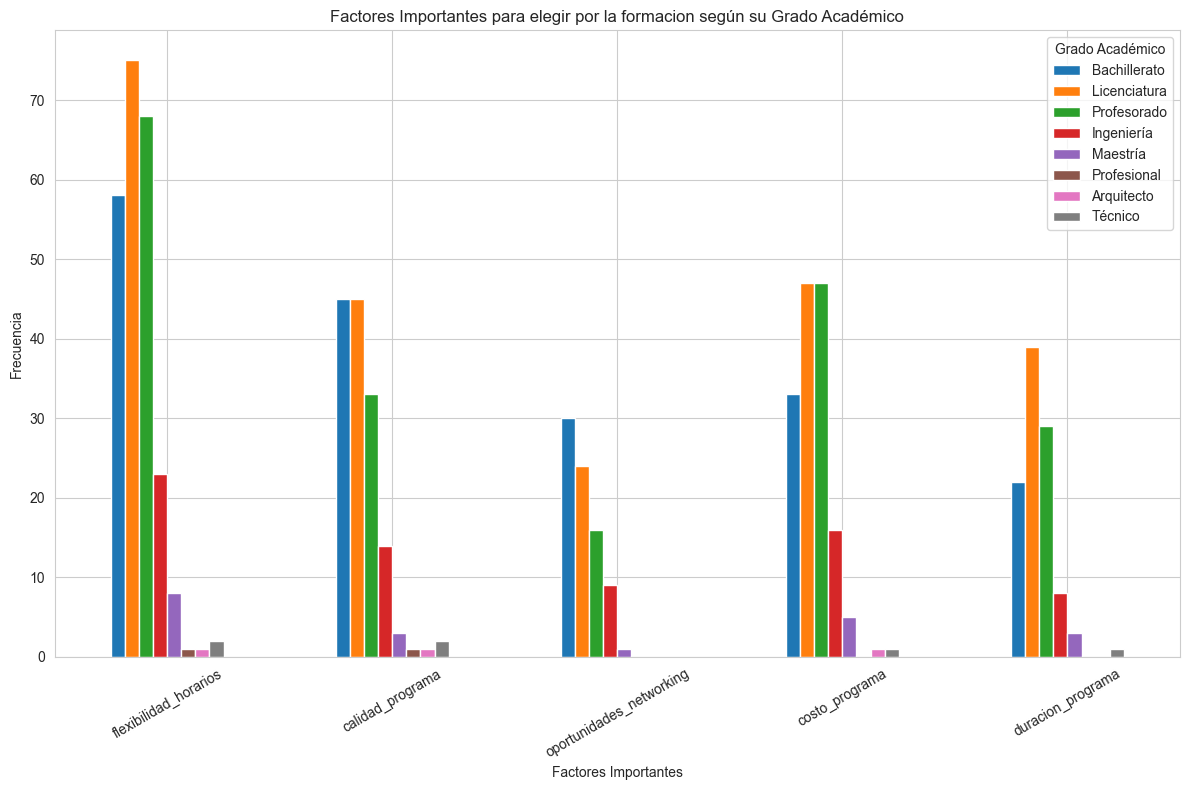

In [248]:
data2 = """
grado_academico	factores_importantes
Bachillerato	flexibilidad_horarios calidad_programa oportunidades_networking
Licenciatura	duracion_programa costo_programa calidad_programa
Bachillerato	flexibilidad_horarios calidad_programa oportunidades_networking
Licenciatura	flexibilidad_horarios costo_programa calidad_programa
Licenciatura	calidad_programa
Bachillerato	flexibilidad_horarios costo_programa oportunidades_networking
Profesorado	duracion_programa flexibilidad_horarios costo_programa
Bachillerato	flexibilidad_horarios costo_programa calidad_programa
Licenciatura	flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Ingeniería	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Maestría	duracion_programa flexibilidad_horarios costo_programa
Profesional	flexibilidad_horarios calidad_programa
Ingeniería	flexibilidad_horarios costo_programa calidad_programa
Bachillerato	flexibilidad_horarios
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Bachillerato	flexibilidad_horarios oportunidades_networking
Bachillerato	duracion_programa flexibilidad_horarios calidad_programa oportunidades_networking
Profesorado	flexibilidad_horarios costo_programa
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Bachillerato	flexibilidad_horarios
Bachillerato	flexibilidad_horarios
Bachillerato	flexibilidad_horarios
Profesorado	flexibilidad_horarios costo_programa
Bachillerato	oportunidades_networking
Bachillerato	flexibilidad_horarios costo_programa
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Profesorado	flexibilidad_horarios costo_programa
Licenciatura	flexibilidad_horarios costo_programa
Maestría	flexibilidad_horarios costo_programa calidad_programa
Licenciatura	flexibilidad_horarios
Licenciatura	duracion_programa flexibilidad_horarios calidad_programa
Profesorado	flexibilidad_horarios costo_programa
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Profesorado	flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Licenciatura	flexibilidad_horarios
Profesorado	flexibilidad_horarios costo_programa calidad_programa
Licenciatura	flexibilidad_horarios
Licenciatura	duracion_programa flexibilidad_horarios costo_programa
Profesorado	duracion_programa flexibilidad_horarios costo_programa oportunidades_networking
Profesorado	duracion_programa flexibilidad_horarios
Licenciatura	flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Bachillerato	duracion_programa flexibilidad_horarios costo_programa oportunidades_networking
Licenciatura	flexibilidad_horarios
Profesorado	duracion_programa flexibilidad_horarios costo_programa
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Bachillerato	flexibilidad_horarios costo_programa calidad_programa
Licenciatura	flexibilidad_horarios calidad_programa
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Profesorado	flexibilidad_horarios costo_programa
Profesorado	costo_programa
Profesorado	duracion_programa flexibilidad_horarios calidad_programa oportunidades_networking
Profesorado	flexibilidad_horarios
Arquitecto	flexibilidad_horarios
Profesorado	flexibilidad_horarios
Licenciatura	duracion_programa flexibilidad_horarios
Licenciatura	flexibilidad_horarios
Maestría	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Maestría	flexibilidad_horarios costo_programa oportunidades_networking
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Profesorado	flexibilidad_horarios oportunidades_networking
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Profesorado	duracion_programa flexibilidad_horarios costo_programa
Ingeniería	duracion_programa flexibilidad_horarios costo_programa
Bachillerato	flexibilidad_horarios calidad_programa
Licenciatura	flexibilidad_horarios costo_programa oportunidades_networking
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Profesorado	flexibilidad_horarios
Profesorado	flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Profesorado	flexibilidad_horarios costo_programa
Ingeniería	costo_programa
Profesorado	flexibilidad_horarios
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Profesorado	flexibilidad_horarios costo_programa calidad_programa
Profesorado	flexibilidad_horarios costo_programa calidad_programa
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Profesorado	oportunidades_networking
Licenciatura	flexibilidad_horarios calidad_programa
Licenciatura	duracion_programa flexibilidad_horarios
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Profesorado	flexibilidad_horarios costo_programa calidad_programa
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Profesorado	flexibilidad_horarios
Profesorado	flexibilidad_horarios costo_programa calidad_programa
Bachillerato	flexibilidad_horarios calidad_programa
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Bachillerato	oportunidades_networking
Bachillerato	duracion_programa costo_programa
Profesorado	flexibilidad_horarios costo_programa
Ingeniería	flexibilidad_horarios costo_programa oportunidades_networking
Profesorado	duracion_programa calidad_programa oportunidades_networking
Profesorado	flexibilidad_horarios calidad_programa oportunidades_networking
Ingeniería	duracion_programa flexibilidad_horarios oportunidades_networking
Profesorado	flexibilidad_horarios costo_programa calidad_programa
Profesorado	duracion_programa flexibilidad_horarios costo_programa
Ingeniería	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Ingeniería	flexibilidad_horarios oportunidades_networking
Profesorado	calidad_programa oportunidades_networking
Licenciatura	flexibilidad_horarios calidad_programa oportunidades_networking
Ingeniería	duracion_programa flexibilidad_horarios calidad_programa
Licenciatura	duracion_programa flexibilidad_horarios
Ingeniería	flexibilidad_horarios costo_programa oportunidades_networking
Bachillerato	flexibilidad_horarios
Licenciatura	flexibilidad_horarios
Licenciatura	flexibilidad_horarios costo_programa
Licenciatura	duracion_programa flexibilidad_horarios calidad_programa
Profesorado	flexibilidad_horarios
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Licenciatura	flexibilidad_horarios costo_programa calidad_programa
Bachillerato	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Técnico	flexibilidad_horarios costo_programa calidad_programa
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Profesorado	flexibilidad_horarios
Licenciatura	flexibilidad_horarios calidad_programa
Licenciatura	duracion_programa flexibilidad_horarios
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Profesorado	flexibilidad_horarios
Licenciatura	flexibilidad_horarios costo_programa calidad_programa
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Licenciatura	duracion_programa flexibilidad_horarios costo_programa
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Licenciatura	flexibilidad_horarios
Licenciatura	flexibilidad_horarios
Bachillerato	flexibilidad_horarios
Bachillerato	flexibilidad_horarios costo_programa
Bachillerato	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Profesorado	flexibilidad_horarios
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Licenciatura	duracion_programa costo_programa calidad_programa
Licenciatura	duracion_programa
Licenciatura	flexibilidad_horarios costo_programa
Licenciatura	duracion_programa flexibilidad_horarios costo_programa oportunidades_networking
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Licenciatura	flexibilidad_horarios
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Licenciatura	flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Licenciatura	duracion_programa flexibilidad_horarios costo_programa
Licenciatura	duracion_programa flexibilidad_horarios calidad_programa
Profesorado	duracion_programa flexibilidad_horarios costo_programa
Ingeniería	flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Profesorado	duracion_programa flexibilidad_horarios costo_programa
Bachillerato	calidad_programa
Profesorado	flexibilidad_horarios calidad_programa
Licenciatura	flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Bachillerato	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Bachillerato	flexibilidad_horarios costo_programa calidad_programa
Bachillerato	flexibilidad_horarios calidad_programa
Bachillerato	flexibilidad_horarios
Bachillerato	flexibilidad_horarios
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Bachillerato	duracion_programa
Licenciatura	flexibilidad_horarios
Bachillerato	duracion_programa calidad_programa oportunidades_networking
Bachillerato	flexibilidad_horarios
Bachillerato	oportunidades_networking
Maestría	duracion_programa flexibilidad_horarios
Maestría	costo_programa
Profesorado	flexibilidad_horarios calidad_programa
Licenciatura	flexibilidad_horarios
Bachillerato	duracion_programa flexibilidad_horarios calidad_programa oportunidades_networking
Bachillerato	calidad_programa
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Ingeniería	costo_programa calidad_programa oportunidades_networking
Bachillerato	flexibilidad_horarios calidad_programa oportunidades_networking
Bachillerato	flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Licenciatura	flexibilidad_horarios costo_programa calidad_programa
Licenciatura	flexibilidad_horarios
Bachillerato	flexibilidad_horarios costo_programa
Bachillerato	flexibilidad_horarios
Bachillerato	duracion_programa calidad_programa
Bachillerato	flexibilidad_horarios
Bachillerato	flexibilidad_horarios costo_programa
Ingeniería	flexibilidad_horarios costo_programa calidad_programa
Profesorado	flexibilidad_horarios
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Bachillerato	duracion_programa costo_programa calidad_programa oportunidades_networking
Bachillerato	flexibilidad_horarios calidad_programa
Bachillerato	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Bachillerato	flexibilidad_horarios
Ingeniería	flexibilidad_horarios
Ingeniería	flexibilidad_horarios costo_programa calidad_programa
Bachillerato	flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Licenciatura	flexibilidad_horarios calidad_programa
Bachillerato	calidad_programa
Bachillerato	calidad_programa
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Bachillerato	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Bachillerato	flexibilidad_horarios costo_programa calidad_programa
Bachillerato	flexibilidad_horarios costo_programa calidad_programa
Bachillerato	flexibilidad_horarios
Bachillerato	calidad_programa
Bachillerato	duracion_programa costo_programa
Bachillerato	costo_programa calidad_programa oportunidades_networking
Bachillerato	duracion_programa
Bachillerato	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Bachillerato	duracion_programa
Bachillerato	duracion_programa flexibilidad_horarios costo_programa
Bachillerato	costo_programa calidad_programa
Bachillerato	oportunidades_networking
Bachillerato	calidad_programa
Bachillerato	flexibilidad_horarios
Bachillerato	oportunidades_networking
Ingeniería	flexibilidad_horarios
Licenciatura	flexibilidad_horarios
Técnico	duracion_programa flexibilidad_horarios calidad_programa
Ingeniería	flexibilidad_horarios costo_programa
Profesorado	duracion_programa flexibilidad_horarios
Profesorado	flexibilidad_horarios costo_programa calidad_programa
Bachillerato	flexibilidad_horarios
Profesorado	flexibilidad_horarios
Bachillerato	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Bachillerato	flexibilidad_horarios
Bachillerato	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Bachillerato	calidad_programa
Bachillerato	flexibilidad_horarios calidad_programa
Bachillerato	flexibilidad_horarios costo_programa calidad_programa
Bachillerato	duracion_programa flexibilidad_horarios calidad_programa
Bachillerato	flexibilidad_horarios costo_programa
Profesorado	flexibilidad_horarios costo_programa
Profesorado	flexibilidad_horarios calidad_programa
Licenciatura	flexibilidad_horarios calidad_programa
Bachillerato	flexibilidad_horarios costo_programa calidad_programa
Licenciatura	duracion_programa oportunidades_networking
Bachillerato	flexibilidad_horarios
Licenciatura	flexibilidad_horarios costo_programa
Maestría	calidad_programa
Licenciatura	flexibilidad_horarios costo_programa oportunidades_networking
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Ingeniería	flexibilidad_horarios costo_programa calidad_programa
Profesorado	flexibilidad_horarios costo_programa calidad_programa
Bachillerato	flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Profesorado	flexibilidad_horarios costo_programa oportunidades_networking
Licenciatura	flexibilidad_horarios calidad_programa
Maestría	flexibilidad_horarios
Ingeniería	flexibilidad_horarios costo_programa calidad_programa
Bachillerato	calidad_programa
Bachillerato	flexibilidad_horarios calidad_programa oportunidades_networking
Ingeniería	flexibilidad_horarios
Licenciatura	costo_programa
Profesorado	flexibilidad_horarios
Ingeniería	flexibilidad_horarios costo_programa
Ingeniería	flexibilidad_horarios calidad_programa oportunidades_networking
Arquitecto	costo_programa calidad_programa
Profesorado	flexibilidad_horarios costo_programa
Ingeniería	duracion_programa flexibilidad_horarios calidad_programa oportunidades_networking
Maestría	flexibilidad_horarios
Profesorado	duracion_programa flexibilidad_horarios costo_programa
Licenciatura	duracion_programa flexibilidad_horarios costo_programa
Licenciatura	flexibilidad_horarios costo_programa
Bachillerato	flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Ingeniería	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Ingeniería	duracion_programa flexibilidad_horarios calidad_programa
Maestría	flexibilidad_horarios
Licenciatura	duracion_programa flexibilidad_horarios costo_programa
Bachillerato	duracion_programa flexibilidad_horarios
Profesorado	flexibilidad_horarios
Bachillerato	calidad_programa oportunidades_networking
Licenciatura	flexibilidad_horarios
Licenciatura	flexibilidad_horarios costo_programa oportunidades_networking
Licenciatura	oportunidades_networking
Licenciatura	flexibilidad_horarios calidad_programa oportunidades_networking
Licenciatura	costo_programa calidad_programa oportunidades_networking
Licenciatura	flexibilidad_horarios oportunidades_networking
Profesorado	flexibilidad_horarios
Profesorado	duracion_programa flexibilidad_horarios costo_programa calidad_programa oportunidades_networking
Bachillerato	costo_programa
Licenciatura	duracion_programa flexibilidad_horarios calidad_programa oportunidades_networking
Profesorado	flexibilidad_horarios costo_programa oportunidades_networking
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Licenciatura	duracion_programa flexibilidad_horarios costo_programa calidad_programa
Licenciatura	flexibilidad_horarios oportunidades_networking
Profesorado	 duracion_programa flexibilidad_horarios costo_programa
"""

# Preparación de los datos
tuplas_datos = []
for line in data2.strip().split("\n")[1:]:
    grado_academico, factores_importantes = line.split("\t")
    tuplas_datos.append((grado_academico, factores_importantes.split()))

# Conteo de factores importantes por grado académico
factores_importantes_count = {}
for grado_academico, factores_importantes in tuplas_datos:
    if grado_academico not in factores_importantes_count:
        factores_importantes_count[grado_academico] = {}
    for factores in factores_importantes:
        if factores not in factores_importantes_count[grado_academico]:
            factores_importantes_count[grado_academico][factores] = 0
        factores_importantes_count[grado_academico][factores] += 1

# Convertir el diccionario en DataFrame para visualización
df2 = pd.DataFrame.from_dict(factores_importantes_count, orient='index').fillna(0)
df2 = df2.transpose()

fig, ax = plt.subplots(figsize=(12, 8))
df2.plot(kind='bar', ax=ax)
ax.set_title('Factores Importantes para elegir por la formacion según su Grado Académico')
ax.set_xlabel('Factores Importantes')
ax.set_ylabel('Frecuencia')
plt.xticks(rotation=30)
plt.legend(title='Grado Académico')
plt.tight_layout()
plt.show()


In [203]:
df2.head()

,Bachillerato,Licenciatura,Profesorado,Ingeniería,Maestría,Profesional,Arquitecto,Técnico
flexibilidad_horarios,58.0,75.0,68.0,23.0,8.0,1.0,1.0,2.0
calidad_programa,45.0,45.0,33.0,14.0,3.0,1.0,1.0,2.0
oportunidades_networking,30.0,24.0,16.0,9.0,1.0,0.0,0.0,0.0
costo_programa,33.0,47.0,47.0,16.0,5.0,0.0,1.0,1.0
duracion_programa,22.0,39.0,29.0,8.0,3.0,0.0,0.0,1.0


In [235]:
data = """
genero	areas_interes
femenino	tecnologia ciencias_economicas ciencias_juridicas 
masculino	tecnologia ciencias_naturales_matematicas agronomia veterinaria
femenino	tecnologia
femenino	ciencias_humanidades
masculino	ciencias_naturales_matematicas
femenino	salud tecnologia ciencias_humanidades agronomia
masculino	ciencias_humanidades
femenino	ciencias_humanidades
femenino	tecnologia
masculino	tecnologia ingenieria_arquitectura
masculino	ciencias_naturales_matematicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
femenino	tecnologia
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
masculino	tecnologia ciencias_economicas
masculino	ciencias_economicas
femenino	ciencias_naturales_matematicas
masculino	ciencias_naturales_matematicas
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura agronomia
femenino	ciencias_economicas
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	ciencias_economicas
masculino	ciencias_economicas
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_juridicas
femenino	ciencias_naturales_matematicas ciencias_humanidades
femenino	ciencias_humanidades
femenino	tecnologia ciencias_humanidades
masculino	ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
femenino	ingenieria_arquitectura
femenino	ciencias_naturales_matematicas ciencias_humanidades veterinaria
femenino	ciencias_naturales_matematicas ciencias_humanidades
masculino	ciencias_naturales_matematicas
masculino	ciencias_naturales_matematicas ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura ciencias_humanidades
femenino	tecnologia ciencias_naturales_matematicas ciencias_humanidades
femenino	ingenieria_arquitectura ciencias_humanidades
femenino	tecnologia ciencias_naturales_matematicas
femenino	tecnologia ciencias_naturales_matematicas
femenino	ciencias_naturales_matematicas
femenino	ciencias_juridicas ciencias_humanidades veterinaria
femenino	ciencias_humanidades
femenino	tecnologia
masculino	tecnologia ciencias_naturales_matematicas
masculino	ciencias_economicas
femenino	ciencias_naturales_matematicas
femenino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	salud ciencias_juridicas
femenino	salud tecnologia ciencias_economicas ciencias_humanidades
femenino	ciencias_humanidades
femenino	ingenieria_arquitectura
femenino	salud tecnologia ciencias_humanidades veterinaria
femenino	tecnologia ciencias_humanidades
femenino	ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ciencias_humanidades
femenino	tecnologia ciencias_humanidades
femenino	tecnologia ciencias_naturales_matematicas ciencias_humanidades
femenino	ciencias_economicas 
femenino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	salud tecnologia ciencias_naturales_matematicas ciencias_economicas
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	salud ciencias_juridicas ingenieria_arquitectura agronomia
femenino	ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura agronomia
femenino	salud ciencias_economicas ingenieria_arquitectura ciencias_humanidades
masculino	salud ciencias_naturales_matematicas ciencias_humanidades veterinaria
masculino	ingenieria_arquitectura
femenino	ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ciencias_humanidades
femenino	ciencias_humanidades
femenino	tecnologia
masculino	ciencias_naturales_matematicas
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas
masculino	tecnologia ciencias_naturales_matematicas ciencias_juridicas ciencias_humanidades
femenino	ciencias_naturales_matematicas
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura agronomia
femenino	tecnologia ciencias_naturales_matematicas ciencias_juridicas ingenieria_arquitectura
femenino	ciencias_humanidades veterinaria
femenino	ciencias_naturales_matematicas
femenino	tecnologia ciencias_humanidades
femenino	ciencias_naturales_matematicas ciencias_humanidades
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas ingenieria_arquitectura ciencias_humanidades  
femenino	ciencias_humanidades
femenino	ciencias_naturales_matematicas
femenino	salud tecnologia ciencias_economicas ciencias_humanidades
masculino	salud ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
femenino	tecnologia ciencias_naturales_matematicas ciencias_juridicas 
femenino	ciencias_economicas
masculino	tecnologia ciencias_economicas ciencias_humanidades
masculino	ciencias_naturales_matematicas ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
femenino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	tecnologia ingenieria_arquitectura ciencias_humanidades veterinaria
femenino	tecnologia ciencias_humanidades
femenino	salud tecnologia ingenieria_arquitectura ciencias_humanidades agronomia
femenino	tecnologia
masculino	tecnologia
masculino	tecnologia ingenieria_arquitectura agronomia veterinaria
femenino	tecnologia ciencias_naturales_matematicas ciencias_juridicas ciencias_humanidades
masculino	tecnologia
masculino	ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
femenino	tecnologia
femenino	salud tecnologia ciencias_economicas ciencias_juridicas
femenino	ciencias_humanidades
femenino	tecnologia ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	ciencias_naturales_matematicas
femenino	tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	tecnologia 
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_humanidades
masculino	tecnologia ingenieria_arquitectura
femenino	ingenieria_arquitectura
femenino	tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	ciencias_humanidades
femenino	ciencias_humanidades
femenino	ciencias_economicas
femenino	salud tecnologia ciencias_juridicas ciencias_humanidades
femenino	ciencias_naturales_matematicas
femenino	tecnologia ciencias_naturales_matematicas
femenino	ciencias_humanidades
femenino	salud agronomia veterinaria
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	salud ciencias_naturales_matematicas ciencias_humanidades veterinaria
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_economicas veterinaria
femenino	salud tecnologia
masculino	ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	tecnologia
femenino	ingenieria_arquitectura
femenino	ciencias_humanidades
femenino	ciencias_humanidades
femenino	ciencias_humanidades
femenino	ciencias_naturales_matematicas ciencias_juridicas ciencias_humanidades veterinaria
masculino	tecnologia
femenino	tecnologia
masculino	tecnologia ciencias_naturales_matematicas ciencias_humanidades
femenino	ciencias_juridicas ciencias_humanidades
femenino	salud ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas ciencias_humanidades
femenino	ciencias_humanidades
femenino	salud ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	ciencias_naturales_matematicas ciencias_humanidades
femenino	tecnologia ciencias_naturales_matematicas ciencias_humanidades veterinaria
masculino	salud tecnologia ciencias_naturales_matematicas ciencias_economicas
femenino	tecnologia ciencias_naturales_matematicas ciencias_humanidades agronomia
femenino	salud ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas agronomia
masculino	salud tecnologia ciencias_naturales_matematicas ciencias_humanidades
masculino	salud tecnologia ciencias_economicas ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura agronomia
femenino	ingenieria_arquitectura
masculino	salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas
masculino	salud ciencias_naturales_matematicas ciencias_juridicas ingenieria_arquitectura
femenino	ciencias_humanidades
masculino	ingenieria_arquitectura
masculino	salud ciencias_juridicas ingenieria_arquitectura ciencias_humanidades
femenino	salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	tecnologia ciencias_economicas agronomia 
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
femenino	tecnologia ingenieria_arquitectura ciencias_humanidades
masculino	ingenieria_arquitectura
femenino	ciencias_naturales_matematicas
femenino	tecnologia ciencias_humanidades
masculino	tecnologia ingenieria_arquitectura
femenino	ingenieria_arquitectura ciencias_humanidades agronomia veterinaria
femenino	salud ingenieria_arquitectura ciencias_humanidades veterinaria
masculino	tecnologia ciencias_economicas ciencias_humanidades
masculino	ciencias_economicas
femenino	ingenieria_arquitectura
femenino	ingenieria_arquitectura
femenino	salud tecnologia ciencias_economicas ingenieria_arquitectura
femenino	agronomia veterinaria
masculino	ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas
masculino	ciencias_naturales_matematicas ingenieria_arquitectura ciencias_humanidades agronomia
femenino	tecnologia
masculino	tecnologia ingenieria_arquitectura agronomia veterinaria
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	ciencias_naturales_matematicas ciencias_humanidades
masculino	ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	ingenieria_arquitectura
masculino	tecnologia ingenieria_arquitectura
femenino	tecnologia ciencias_humanidades
femenino	salud ciencias_economicas ingenieria_arquitectura ciencias_humanidades
femenino	tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
femenino	ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	salud
masculino	veterinaria
femenino	ingenieria_arquitectura
masculino	salud ciencias_juridicas ingenieria_arquitectura
femenino	tecnologia ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	salud tecnologia ingenieria_arquitectura agronomia
masculino	ciencias_naturales_matematicas veterinaria
masculino	salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	tecnologia ingenieria_arquitectura agronomia veterinaria
femenino	ingenieria_arquitectura
masculino	tecnologia ciencias_economicas ciencias_juridicas
masculino	tecnologia ciencias_naturales_matematicas agronomia
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	salud tecnologia ciencias_economicas ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ciencias_juridicas
femenino	tecnologia ingenieria_arquitectura veterinaria
femenino	ingenieria_arquitectura
femenino	ciencias_economicas ciencias_humanidades
masculino	ingenieria_arquitectura
femenino	ingenieria_arquitectura agronomia
masculino	tecnologia ingenieria_arquitectura
femenino	salud tecnologia ciencias_humanidades
femenino	ingenieria_arquitectura
masculino	ciencias_naturales_matematicas ingenieria_arquitectura
femenino	salud ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	tecnologia ciencias_economicas ciencias_juridicas ingenieria_arquitectura
masculino	tecnologia ingenieria_arquitectura
masculino	ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ciencias_humanidades
masculino	ingenieria_arquitectura
masculino	ingenieria_arquitectura
femenino	ciencias_economicas ingenieria_arquitectura agronomia
femenino	tecnologia
femenino	ciencias_economicas
femenino	salud tecnologia ciencias_economicas agronomia
masculino	ciencias_economicas ingenieria_arquitectura
femenino	tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	ciencias_economicas
femenino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura 
femenino	ciencias_naturales_matematicas
masculino	salud ciencias_economicas ciencias_juridicas ingenieria_arquitectura
femenino	salud tecnologia veterinaria
femenino	ciencias_economicas
masculino	ciencias_naturales_matematicas
femenino	ciencias_economicas ciencias_humanidades
masculino	salud tecnologia ciencias_economicas ciencias_juridicas
femenino	ciencias_economicas ingenieria_arquitectura
masculino	ingenieria_arquitectura
masculino	ciencias_economicas
femenino	salud
masculino	ingenieria_arquitectura
femenino	ingenieria_arquitectura
masculino	ingenieria_arquitectura
femenino	ingenieria_arquitectura
femenino	tecnologia ciencias_economicas ingenieria_arquitectura ciencias_humanidades
masculino	ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura
femenino	ciencias_naturales_matematicas ciencias_humanidades
masculino	salud tecnologia ciencias_naturales_matematicas ingenieria_arquitectura ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas
masculino	ingenieria_arquitectura
femenino	ciencias_naturales_matematicas ingenieria_arquitectura
masculino	ciencias_naturales_matematicas ingenieria_arquitectura
femenino	ciencias_economicas
masculino	ingenieria_arquitectura
masculino	ciencias_naturales_matematicas
femenino	ingenieria_arquitectura
femenino	ciencias_naturales_matematicas
femenino	ciencias_naturales_matematicas
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura
femenino	tecnologia ciencias_naturales_matematicas ciencias_juridicas ingenieria_arquitectura
masculino	tecnologia ciencias_naturales_matematicas ingenieria_arquitectura ciencias_humanidades
femenino	salud tecnologia ciencias_naturales_matematicas ciencias_humanidades
masculino	ciencias_naturales_matematicas ciencias_economicas ciencias_humanidades
masculino	tecnologia ciencias_humanidades
masculino	tecnologia ciencias_naturales_matematicas
femenino	salud ciencias_humanidades
femenino	tecnologia ciencias_economicas ciencias_juridicas ciencias_humanidades
femenino	ciencias_economicas
masculino	salud tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas ingenieria_arquitectura
masculino	ciencias_naturales_matematicas 
masculino	tecnologia ciencias_naturales_matematicas ciencias_humanidades veterinaria
"""


In [236]:

df = pd.read_csv(StringIO(data), delimiter='\t')

# Comprobar las columnas y su tipo
print(df.dtypes)

# Expansión correcta de las áreas de interés
interests_expanded = df['areas_interes'].str.get_dummies(sep=' ')
df = df.join(interests_expanded)
print(df.head())

genero           object
areas_interes    object
dtype: object
      genero                                      areas_interes  agronomia  \
0   femenino  tecnologia ciencias_economicas ciencias_juridi...          0   
1  masculino  tecnologia ciencias_naturales_matematicas agro...          1   
2   femenino                                         tecnologia          0   
3   femenino                               ciencias_humanidades          0   
4  masculino                     ciencias_naturales_matematicas          0   

   ciencias_economicas  ciencias_humanidades  ciencias_juridicas  \
0                    1                     0                   1   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     1                   0   
4                    0                     0                   0   

   ciencias_naturales_matematicas  ingenieria_arquitectura  

In [240]:
# Convertir todas las columnas expandidas a numérico, asegurándose de que no hay strings
for column in interests_expanded.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

# Sumar cada columna de interés por género
interest_counts = df.groupby('genero').sum()

# Verificar los tipos de datos nuevamente
print(interest_counts.dtypes)


areas_interes                     object
agronomia                          int64
ciencias_economicas                int64
ciencias_humanidades               int64
ciencias_juridicas                 int64
ciencias_naturales_matematicas     int64
ingenieria_arquitectura            int64
salud                              int64
tecnologia                         int64
veterinaria                        int64
dtype: object


In [242]:
# Convert string values to numerical values in interest_counts
interest_counts_numeric = interest_counts.apply(pd.to_numeric)

# Realizar la prueba de Chi-Cuadrado
chi2, p_value, dof, expected = chi2_contingency(interest_counts_numeric.T)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)


ValueError: Unable to parse string "tecnologia ciencias_economicas ciencias_juridicas tecnologiaciencias_humanidadessalud tecnologia ciencias_humanidades agronomiaciencias_humanidadestecnologiatecnologiaciencias_naturales_matematicasciencias_economicassalud tecnologia ciencias_naturales_matematicas ciencias_humanidadesciencias_economicassalud tecnologia ciencias_naturales_matematicas ciencias_juridicasciencias_naturales_matematicas ciencias_humanidadesciencias_humanidadestecnologia ciencias_humanidadesingenieria_arquitecturaciencias_naturales_matematicas ciencias_humanidades veterinariaciencias_naturales_matematicas ciencias_humanidadestecnologia ciencias_naturales_matematicas ciencias_humanidadesingenieria_arquitectura ciencias_humanidadestecnologia ciencias_naturales_matematicastecnologia ciencias_naturales_matematicasciencias_naturales_matematicasciencias_juridicas ciencias_humanidades veterinariaciencias_humanidadestecnologiaciencias_naturales_matematicastecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas ciencias_humanidadessalud ciencias_juridicassalud tecnologia ciencias_economicas ciencias_humanidadesciencias_humanidadesingenieria_arquitecturasalud tecnologia ciencias_humanidades veterinariatecnologia ciencias_humanidadesciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ciencias_humanidadestecnologia ciencias_humanidadestecnologia ciencias_naturales_matematicas ciencias_humanidadesciencias_economicas tecnologia ciencias_naturales_matematicas ingenieria_arquitecturaciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura agronomiasalud ciencias_economicas ingenieria_arquitectura ciencias_humanidadesciencias_naturales_matematicas ciencias_economicas ingenieria_arquitectura ciencias_humanidadesciencias_humanidadestecnologiaciencias_naturales_matematicastecnologia ciencias_naturales_matematicas ciencias_juridicas ingenieria_arquitecturaciencias_humanidades veterinariaciencias_naturales_matematicastecnologia ciencias_humanidadesciencias_naturales_matematicas ciencias_humanidadessalud tecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_juridicas ingenieria_arquitectura ciencias_humanidades  ciencias_humanidadesciencias_naturales_matematicassalud tecnologia ciencias_economicas ciencias_humanidadestecnologia ciencias_naturales_matematicas ciencias_juridicas ciencias_economicastecnologia ciencias_naturales_matematicas ingenieria_arquitecturatecnologia ciencias_humanidadessalud tecnologia ingenieria_arquitectura ciencias_humanidades agronomiatecnologiatecnologia ciencias_naturales_matematicas ciencias_juridicas ciencias_humanidadestecnologiasalud tecnologia ciencias_economicas ciencias_juridicasciencias_humanidadestecnologia ingenieria_arquitecturatecnologia ciencias_economicas ciencias_juridicas ciencias_humanidadestecnologia salud tecnologia ciencias_naturales_matematicas ciencias_humanidadesingenieria_arquitecturatecnologia ciencias_economicas ciencias_juridicas ciencias_humanidadesciencias_humanidadesciencias_humanidadesciencias_economicassalud tecnologia ciencias_juridicas ciencias_humanidadesciencias_naturales_matematicastecnologia ciencias_naturales_matematicasciencias_humanidadessalud agronomia veterinariasalud ciencias_naturales_matematicas ciencias_humanidades veterinariasalud tecnologia ciencias_naturales_matematicas ciencias_economicas veterinariasalud tecnologiatecnologiaingenieria_arquitecturaciencias_humanidadesciencias_humanidadesciencias_humanidadesciencias_naturales_matematicas ciencias_juridicas ciencias_humanidades veterinariatecnologiaciencias_juridicas ciencias_humanidadessalud ciencias_humanidadesciencias_humanidadessalud ciencias_naturales_matematicas ciencias_economicas ciencias_humanidadestecnologia ciencias_naturales_matematicas ciencias_humanidades veterinariatecnologia ciencias_naturales_matematicas ciencias_humanidades agronomiasalud ingenieria_arquitecturaingenieria_arquitecturaciencias_humanidadessalud tecnologia ciencias_naturales_matematicas ingenieria_arquitecturatecnologia ingenieria_arquitectura ciencias_humanidadesciencias_naturales_matematicastecnologia ciencias_humanidadesingenieria_arquitectura ciencias_humanidades agronomia veterinariasalud ingenieria_arquitectura ciencias_humanidades veterinariaingenieria_arquitecturaingenieria_arquitecturasalud tecnologia ciencias_economicas ingenieria_arquitecturaagronomia veterinariatecnologiaciencias_naturales_matematicas ciencias_humanidadestecnologia ciencias_naturales_matematicas ciencias_economicas ciencias_humanidadestecnologia ciencias_humanidadessalud ciencias_economicas ingenieria_arquitectura ciencias_humanidadestecnologia ciencias_naturales_matematicas ciencias_economicas ingenieria_arquitecturaingenieria_arquitecturaingenieria_arquitecturatecnologia ingenieria_arquitecturatecnologia ingenieria_arquitectura agronomia veterinariaingenieria_arquitecturatecnologia ingenieria_arquitectura veterinariaingenieria_arquitecturaciencias_economicas ciencias_humanidadesingenieria_arquitectura agronomiasalud tecnologia ciencias_humanidadesingenieria_arquitecturasalud ciencias_naturales_matematicas ciencias_economicas ciencias_humanidadesciencias_economicas ingenieria_arquitectura agronomiatecnologiaciencias_economicassalud tecnologia ciencias_economicas agronomiatecnologia ciencias_economicas ciencias_juridicas ciencias_humanidadesciencias_economicastecnologia ciencias_naturales_matematicas ingenieria_arquitectura ciencias_naturales_matematicassalud tecnologia veterinariaciencias_economicasciencias_economicas ciencias_humanidadesciencias_economicas ingenieria_arquitecturasaludingenieria_arquitecturaingenieria_arquitecturatecnologia ciencias_economicas ingenieria_arquitectura ciencias_humanidadesciencias_naturales_matematicas ciencias_humanidadesciencias_naturales_matematicas ingenieria_arquitecturaciencias_economicasingenieria_arquitecturaciencias_naturales_matematicasciencias_naturales_matematicastecnologia ciencias_naturales_matematicas ciencias_juridicas ingenieria_arquitecturasalud tecnologia ciencias_naturales_matematicas ciencias_humanidadessalud ciencias_humanidadestecnologia ciencias_economicas ciencias_juridicas ciencias_humanidadesciencias_economicas" at position 0

In [243]:
from scipy.stats import spearmanr

# Asumiendo que 'Experiencia_Laboral' es numérica y 'Calidad_Programa' es una calificación numérica
correlation, p_value = spearmanr(df['Experiencia_Laboral'], df['Calidad_Programa'])

print("Spearman correlation:", correlation)
print("P-value:", p_value)


KeyError: 'Experiencia_Laboral'